# LSTM Model for Forex Prediction - Exploratory Analysis
This notebook explores the forex data and builds an initial LSTM model using PyTorch.

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
import mlflow
import mlflow.pytorch

In [4]:
# Configure MLflow
mlflow.set_tracking_uri("http://localhost:5000")

## 1. Load and Explore Data

Load the data

In [55]:
data_path = "/home/ayaan-ubuntu/DA5402/DA5402-ML-Application/data/prepared/USD_INR_transformed.csv" 
df = pd.read_csv(data_path)

Display basic information

In [12]:
print(f"Data shape: {df.shape}")
df.head()

Data shape: (378, 15)


,date,open,high,low,close,MA5,MA10,MA22,RSI,BB_std,BB_upper,BB_lower,price_roc,daily_return,target
0,2023-11-14,83.160,83.2530,82.874,82.953,83.1836,83.1877,83.174818,29.003021,0.090445,83.355708,82.993929,-0.308857,-0.282493,83.168
1,2023-11-15,82.955,83.1900,82.919,83.168,83.1786,83.1828,83.173818,47.161066,0.090390,83.354599,82.993037,-0.030051,0.259183,83.132
2,2023-11-16,83.161,83.2475,83.118,83.132,83.1460,83.1746,83.169364,45.424107,0.089903,83.349170,82.989557,-0.195690,-0.043286,83.224
3,2023-11-17,83.132,83.2900,83.132,83.224,83.1330,83.1850,83.168091,55.816555,0.088870,83.345831,82.990351,-0.078042,0.110667,83.314
4,2023-11-20,83.221,83.3800,83.205,83.314,83.1582,83.1966,83.178636,56.401766,0.091882,83.362400,82.994873,0.151464,0.108142,83.260


### Check for missing values

Check for missing values

In [13]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
date            0
open            0
high            0
low             0
close           0
MA5             0
MA10            0
MA22            0
RSI             0
BB_std          0
BB_upper        0
BB_lower        0
price_roc       0
daily_return    0
target          0
dtype: int64


### Exploratory Data Analysis

Statistical summary

In [14]:
df.describe()

,open,high,low,close,MA5,MA10,MA22,RSI,BB_std,BB_upper,BB_lower,price_roc,daily_return,target
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000
mean,84.187188,84.294026,84.100954,84.191579,84.180923,84.166585,84.125531,54.703111,0.192231,84.509993,83.741070,0.032437,0.006704,84.197947
std,1.278484,1.318185,1.249061,1.275523,1.269508,1.262163,1.239586,19.337388,0.144603,1.485077,1.017336,0.350391,0.153280,1.275331
min,82.660000,82.730000,82.630000,82.666000,82.736600,82.792800,82.841227,3.567568,0.050032,82.996958,82.481369,-1.291387,-0.778749,82.666000
25%,83.288500,83.380625,83.213000,83.300000,83.303250,83.277675,83.255284,42.082597,0.096904,83.493604,83.020643,-0.099404,-0.053409,83.300500
50%,83.682500,83.739000,83.611000,83.682000,83.679200,83.652450,83.614568,54.579649,0.134834,83.863731,83.365249,0.029858,0.007794,83.687000
75%,84.818500,84.879750,84.760500,84.838000,84.796950,84.733750,84.542443,67.045635,0.236564,84.933132,84.152711,0.182145,0.068351,84.855000
max,87.593000,87.972000,87.382000,87.593000,87.389000,87.164400,87.017500,100.000000,0.713435,87.939474,86.437799,1.395392,0.609438,87.593000


Visualize price and target

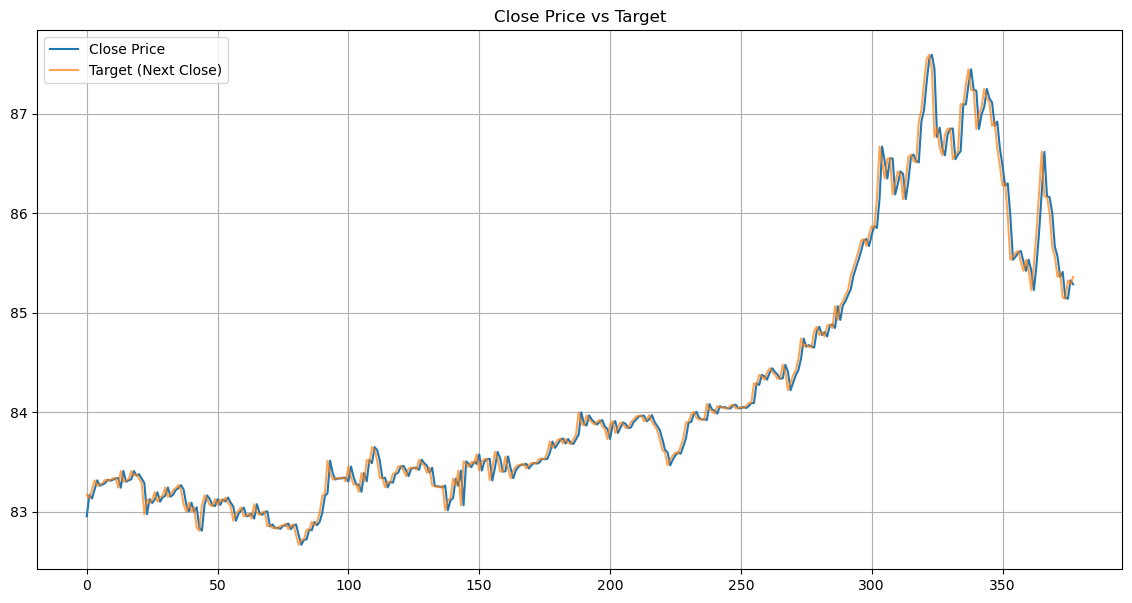

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(df['close'], label='Close Price')
plt.plot(df['target'], label='Target (Next Close)', alpha=0.7)
plt.title('Close Price vs Target')
plt.legend()
plt.grid(True)
plt.show()

Visualize technical indicators

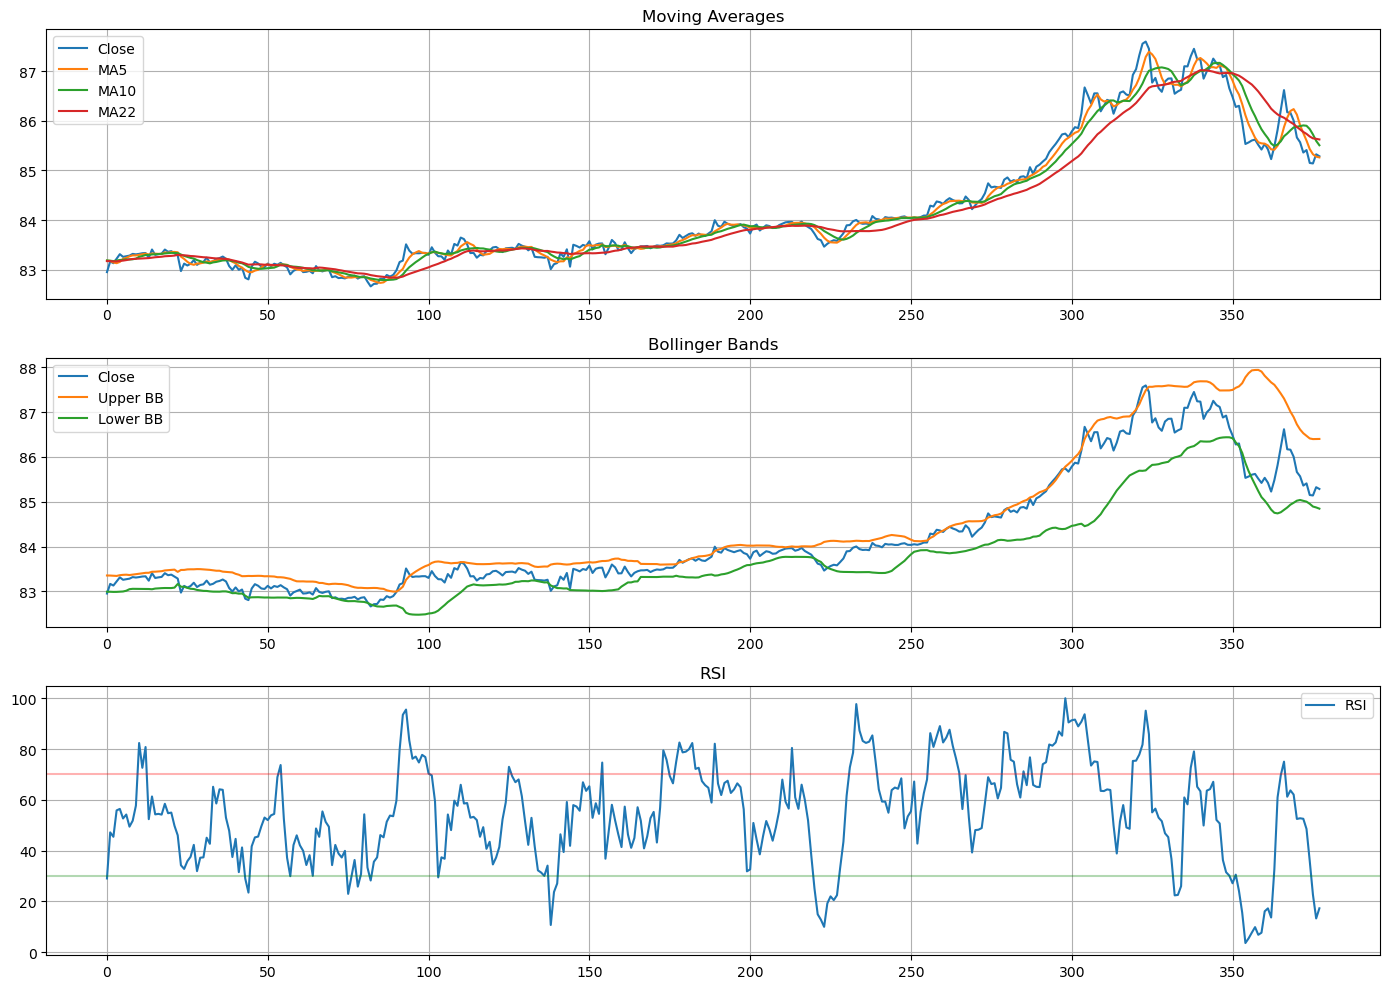

In [16]:
plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.plot(df['close'], label='Close')
plt.plot(df['MA5'], label='MA5')
plt.plot(df['MA10'], label='MA10')
plt.plot(df['MA22'], label='MA22')
plt.title('Moving Averages')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(df['close'], label='Close')
plt.plot(df['BB_upper'], label='Upper BB')
plt.plot(df['BB_lower'], label='Lower BB')
plt.title('Bollinger Bands')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(df['RSI'], label='RSI')
plt.axhline(y=70, color='r', linestyle='-', alpha=0.3)
plt.axhline(y=30, color='g', linestyle='-', alpha=0.3)
plt.title('RSI')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Correlation matrix

In [ ]:
# plt.figure(figsize=(12, 10))
# correlation = df.drop(columns=['date']).corr()
# sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Feature Correlation Matrix')
# plt.tight_layout()
# plt.show()

## 2. Prepare Data for LSTM

Define sequence length

In [ ]:
sequence_length = 350

# Extract features and target
features = df.drop(['target', 'date'], axis=1).values
target = df['target'].values

# Normalize features
scaler = StandardScaler()
features

array([[ 8.31600000e+01,  8.32530000e+01,  8.28740000e+01, ...,
         8.29939287e+01, -3.08857109e-01, -2.82492667e-01],
       [ 8.29550000e+01,  8.31900000e+01,  8.29190000e+01, ...,
         8.29930372e+01, -3.00506052e-02,  2.59182911e-01],
       [ 8.31610000e+01,  8.32475000e+01,  8.31180000e+01, ...,
         8.29895568e+01, -1.95690017e-01, -4.32858792e-02],
       ...,
       [ 8.51500000e+01,  8.52090000e+01,  8.50210000e+01, ...,
         8.48932746e+01, -6.10531968e-01, -1.17439812e-02],
       [ 8.51400000e+01,  8.55250000e+01,  8.51400000e+01, ...,
         8.48727110e+01, -2.83987986e-01,  2.16114635e-01],
       [ 8.53240000e+01,  8.56675000e+01,  8.52010000e+01, ...,
         8.48459548e+01, -8.78631678e-02, -4.57081243e-02]])

Normalize features

In [44]:
# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Create sequences
X, y = [], []
for i in range(len(features_scaled) - sequence_length):
    X.append(features_scaled[i:i + sequence_length])
    y.append(target[i + sequence_length])

X = np.array(X)
y = np.array(y).reshape(-1, 1)

print(f"X shape: {X.shape}")  # [samples, sequence_length, features]
print(f"y shape: {y.shape}")  # [samples, 1]

X shape: (28, 350, 13)
y shape: (28, 1)


In [45]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: torch.Size([22, 350, 13])
Test set: torch.Size([6, 350, 13])


## 3. Define LSTM Model

In [5]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.2):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # LSTM layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, 
                           batch_first=True, dropout=dropout if num_layers > 1 else 0)
        
        # Fully connected layer
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))
        
        # We only need the output from the last time step
        out = self.fc(out[:, -1, :])
        return out

## 4. Train Model with MLflow Tracking

Set hyperparameters

In [46]:
input_size = X_train.shape[2]  # Number of features
hidden_size = 256
num_layers = 3
output_size = 1  # Regression task
dropout = 0.2

batch_size = 32
learning_rate = 0.001
num_epochs = 10

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Initialize model, loss function and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

model = LSTMModel(input_size, hidden_size, num_layers, output_size, dropout)
model.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Using device: cuda


Start MLflow run

In [ ]:
mlflow.set_experiment("forex_prediction_exploration")

with mlflow.start_run(run_name="LSTM_exploration"):
    # Log model parameters
    mlflow.log_params({
        "hidden_size": hidden_size,
        "num_layers": num_layers,
        "dropout": dropout,
        "batch_size": batch_size,
        "learning_rate": learning_rate,
        "num_epochs": num_epochs,
        "sequence_length": sequence_length
    })
    
    # Lists to store losses for plotting
    train_losses = []
    test_losses = []
    
    # Training loop
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            
            # Forward pass
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            
            # Backward pass and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        # Calculate average loss for the epoch
        avg_loss = total_loss / len(train_loader)
        train_losses.append(avg_loss)
        
        # Evaluate on test set
        model.eval()
        with torch.no_grad():
            test_X, test_y = X_test.to(device), y_test.to(device)
            predictions = model(test_X)
            test_loss = criterion(predictions, test_y).item()
            test_losses.append(test_loss)
            
            # Calculate metrics
            mae = torch.mean(torch.abs(predictions - test_y)).item()
            
            # For directional accuracy
            actual_direction = (test_y[1:] > test_y[:-1]).float()
            pred_direction = (predictions[1:] > predictions[:-1]).float()
            directional_accuracy = torch.mean((actual_direction == pred_direction).float()).item()
        
        # Log metrics to MLflow
        mlflow.log_metrics({
            "train_loss": avg_loss,
            "test_loss": test_loss,
            "mae": mae,
            "directional_accuracy": directional_accuracy
        }, step=epoch)
        
        # Print progress
        if (epoch+1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], "
                f"Train Loss: {avg_loss:.4f}, "
                f"Test Loss: {test_loss:.4f}, "
                f"MAE: {mae:.4f}, "
                f"Dir Acc: {directional_accuracy:.4f}")
    
    # Save model
    mlflow.pytorch.log_model(model, "model")
    
    # Get run ID for reference
    run_id = mlflow.active_run().info.run_id
    print(f"MLflow Run ID: {run_id}")

## 5. Visualize Training Results

Plot training and test loss

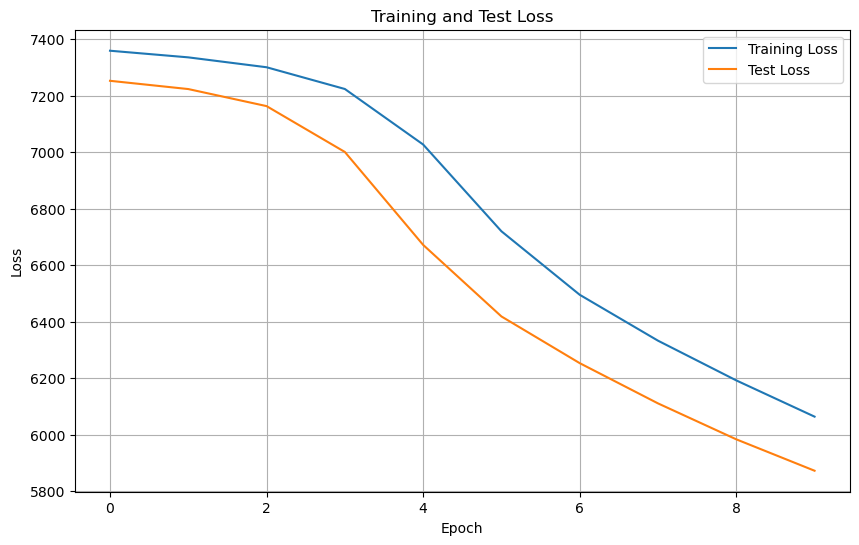

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## 6. Model Evaluation and Predictions

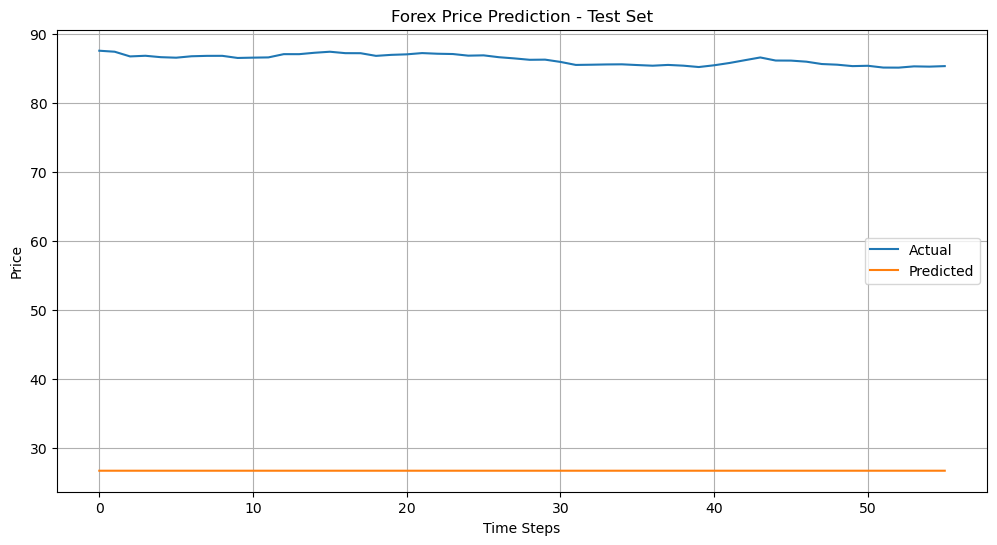

In [28]:
# Make predictions on test set
model.eval()
with torch.no_grad():
    test_X = X_test.to(device)
    predictions = model(test_X).cpu().numpy()
    actuals = y_test.numpy()

# Plot predictions vs actuals
plt.figure(figsize=(12, 6))
plt.plot(actuals, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Forex Price Prediction - Test Set')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

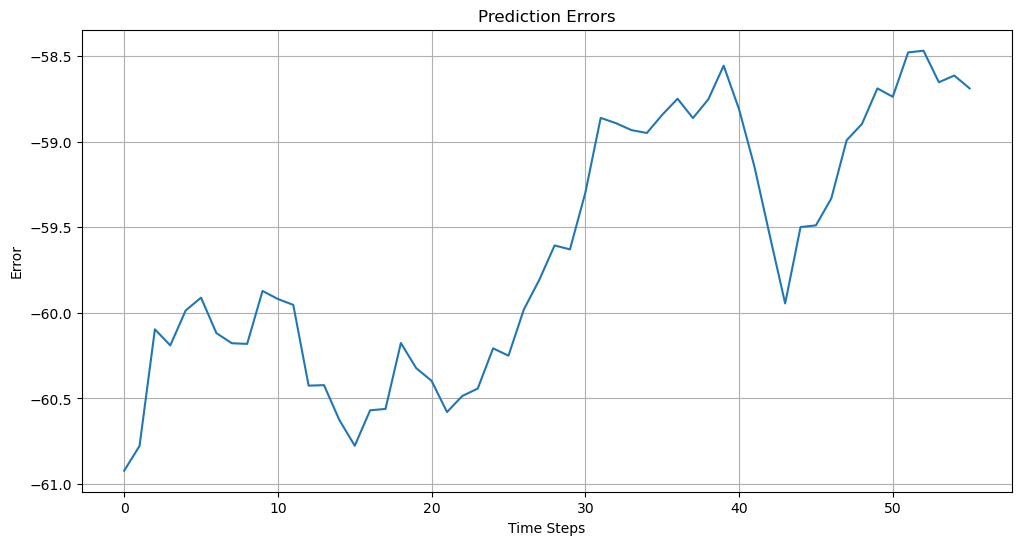

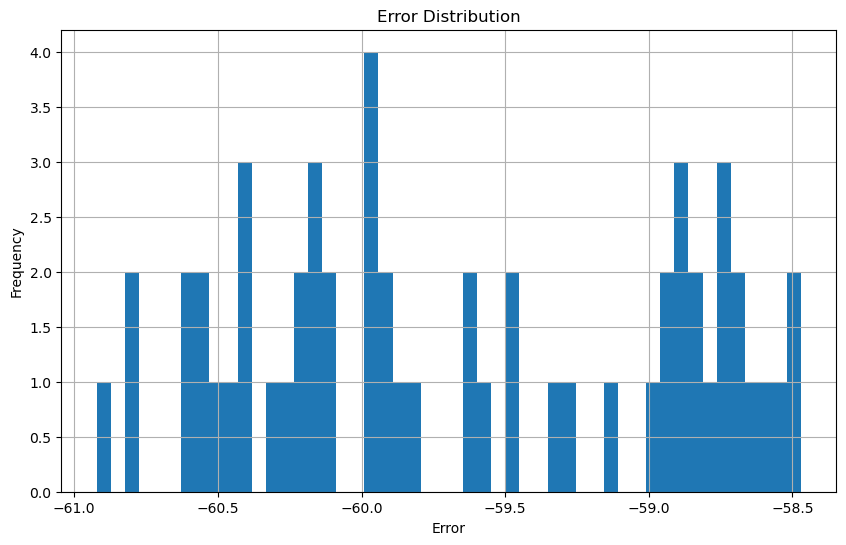

In [29]:
# Error analysis
errors = predictions - actuals
plt.figure(figsize=(12, 6))
plt.plot(errors)
plt.title('Prediction Errors')
plt.xlabel('Time Steps')
plt.ylabel('Error')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50)
plt.title('Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## 7. Directional Accuracy Analysis

In [30]:
# Calculate directional movement
actual_direction = np.diff(actuals.flatten()) > 0
pred_direction = np.diff(predictions.flatten()) > 0

# Calculate directional accuracy
directional_accuracy = np.mean(actual_direction == pred_direction)
print(f"Directional Accuracy: {directional_accuracy:.4f}")

# Confusion matrix for direction prediction
confusion = pd.crosstab(
    pd.Series(actual_direction, name='Actual'),
    pd.Series(pred_direction, name='Predicted')
)
print("\nConfusion Matrix (Direction):")
print(confusion)

Directional Accuracy: 0.4727

Confusion Matrix (Direction):
Predicted  False  True 
Actual                 
False         14     16
True          13     12


## 8. MLflow Experiment Tracking

In [31]:
# Query previous runs
runs = mlflow.search_runs(experiment_names=["forex_prediction_exploration"])
runs[["run_id", "metrics.test_loss", "metrics.directional_accuracy", "params.hidden_size", "params.num_layers"]]

,run_id,metrics.test_loss,metrics.directional_accuracy,params.hidden_size,params.num_layers
0,1678f31962784fbd848746b969eb8d45,3557.957031,0.472727,64,2


## 9. Hyperparameter Tuning

Data preparation function

In [6]:
def prepare_data(df, sequence_length):
    # Extract features and target
    features = df.drop(['target', 'date'], axis=1).values
    target = df['target'].values

    # Normalize features
    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    # Create sequences
    X, y = [], []
    for i in range(len(features) - sequence_length):
        X.append(features[i:i + sequence_length])
        y.append(target[i + sequence_length])

    X = np.array(X)
    y = np.array(y).reshape(-1, 1)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

    # Convert to PyTorch tensors
    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32)
    X_val = torch.tensor(X_val, dtype=torch.float32)
    y_val = torch.tensor(y_val, dtype=torch.float32)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_test = torch.tensor(y_test, dtype=torch.float32)

    print(f"Training set: {X_train.shape}")
    print(f"Training set: {X_val.shape}")
    print(f"Test set: {X_test.shape}")

    return X_train, X_val, X_test, y_train, y_val, y_test

Model training function

In [7]:
from itertools import product
from tqdm import tqdm

In [ ]:
def train(X_train, y_train, X_val, y_val, model_params, training_params):
    """
    Train and evaluate LSTM model
    """
    # Unpack parameters
    input_size = X_train.shape[2]  # Number of features
    hidden_size = model_params['hidden_size']
    num_layers = model_params['num_layers']
    output_size = 1  # Regression task
    dropout = model_params['dropout']
    
    batch_size = training_params['batch_size']
    learning_rate = training_params['learning_rate']
    num_epochs = training_params['num_epochs']
    
    # Create DataLoader
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    # Initialize model, loss function and optimizer
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    model = LSTMModel(input_size, hidden_size, num_layers, output_size, dropout)
    model.to(device)
    
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    run_name = f"hs{hidden_size}_nl{num_layers}_dr{dropout}_bs{batch_size}_lr{learning_rate}"
    # Start MLflow run
    with mlflow.start_run(run_name=run_name):
        # Log model parameters
        mlflow.log_params({
            "hidden_size": hidden_size,
            "num_layers": num_layers,
            "dropout": dropout,
            "batch_size": batch_size,
            "learning_rate": learning_rate,
            "num_epochs": num_epochs,
            "input_size": input_size,
            "sequence_length": X_train.shape[1]
        })
        
        pbar = tqdm(range(num_epochs), desc="Training Progress")
        for epoch in pbar:
            model.train()
            total_loss = 0

            for batch_X, batch_y in train_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                
                # Forward pass
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                
                # Backward pass and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
                total_loss += loss.item()
            
            # Calculate average loss for the epoch
            avg_loss = total_loss / len(train_loader)
            
            # Evaluate on test set
            model.eval()
            with torch.no_grad():
                val_X, val_y = X_val.to(device), y_val.to(device)
                predictions = model(val_X)
                val_loss = criterion(predictions, val_y).item()
                
                # Calculate metrics
                mae = torch.mean(torch.abs(predictions - val_y)).item()
                
                # For directional accuracy
                actual_direction = (val_y[1:] > val_y[:-1]).float()
                pred_direction = (predictions[1:] > predictions[:-1]).float()
                directional_accuracy = torch.mean((actual_direction == pred_direction).float()).item()
            
            # Log metrics to MLflow
            mlflow.log_metrics({
                "train_loss": avg_loss,
                "val_loss": val_loss,
                "mae": mae,
                "directional_accuracy": directional_accuracy
            }, step=epoch)
            
            # Update tqdm progress bar in-place
            pbar.set_postfix({
                'Train Loss': f"{avg_loss:.4f}",
                'Val Loss': f"{val_loss:.4f}",
                'MAE': f"{mae:.4f}",
                'Dir Acc': f"{directional_accuracy:.4f}"
            })
            
            # Save model
            mlflow.pytorch.log_model(model, "model")
        
        # Get run ID for reference
        run_id = mlflow.active_run().info.run_id
        print(f"MLflow Run ID: {run_id}")
        
        # Return model and metrics for further use
        final_metrics = {
            "val_loss": val_loss,
            "mae": mae,
            "directional_accuracy": directional_accuracy,
            "run_id": run_id
        }
        
    return model, final_metrics

Hyperparameter Tuning

In [9]:
import json

In [10]:
def run_hyperparameter_tuning(df, sequence_length, param_grid):
    """
    Run hyperparameter tuning with MLflow tracking
    """
    
    # Prepare data
    X_train, X_val, _, y_train, y_val, _ = prepare_data(df, sequence_length)
    
    # Generate all combinations of hyperparameters
    param_combinations = list(product(
        param_grid['hidden_size'],
        param_grid['num_layers'],
        param_grid['dropout'],
        param_grid['batch_size'],
        param_grid['learning_rate'],
        param_grid['num_epochs']
    ))
    
    print(f"Running hyperparameter tuning with {len(param_combinations)} combinations")
    
    # Store results
    results = []
    
    # Run training for each combination
    for hidden_size, num_layers, dropout, batch_size, learning_rate, num_epochs in param_combinations:
        print(f"Training with: hidden_size={hidden_size}, num_layers={num_layers}, "
              f"dropout={dropout}, batch_size={batch_size}, "
              f"learning_rate={learning_rate}, num_epochs={num_epochs}")
        
        model_params = {
            'hidden_size': hidden_size,
            'num_layers': num_layers,
            'dropout': dropout
        }
        
        training_params = {
            'batch_size': batch_size,
            'learning_rate': learning_rate,
            'num_epochs': num_epochs
        }
        
        # Train and evaluate model
        model, metrics = train(X_train, y_train, X_val, y_val, model_params, training_params)
        
        # Store results
        result = {
            'hidden_size': hidden_size,
            'num_layers': num_layers,
            'dropout': dropout,
            'batch_size': batch_size,
            'learning_rate': learning_rate,
            'num_epochs': num_epochs,
            'val_loss': metrics['val_loss'],
            'mae': metrics['mae'],
            'directional_accuracy': metrics['directional_accuracy'],
            'run_id': metrics['run_id']
        }
        
        results.append(result)
    
    # Create results dataframe
    results_df = pd.DataFrame(results)
    
    # Find best model based on val loss
    best_idx = results_df['val_loss'].idxmin()
    best_model = results_df.iloc[best_idx]
    
    print(f"Best model found with val_loss: {best_model['val_loss']:.4f}")
    print(f"Best hyperparameters: {best_model.to_dict()}")
    
    # Save results
    os.makedirs('tuning_results', exist_ok=True)
    results_df.to_csv('tuning_results/hyperparameter_results.csv', index=False)
    
    with open('tuning_results/best_params.json', 'w') as f:
        json.dump(best_model.to_dict(), f, indent=4)
    
    return best_model.to_dict()

In [18]:
import warnings
import logging
from tqdm import tqdm

# Suppress warnings from mlflow (and related libraries)
logging.getLogger("mlflow").setLevel(logging.ERROR)

# Alternatively, use warnings module to suppress UserWarnings from mlflow
warnings.filterwarnings("ignore", category=UserWarning, module="mlflow")

In [19]:
mlflow.set_experiment("HT 2 Forex Pred") 

# Define hyperparameter grid
param_grid = {
    'hidden_size': [256, 512],
    'num_layers': [1, 2, 3],
    'dropout': [0.3, 0.5],
    'batch_size': [32, 64],
    'learning_rate': [0.001],
    'num_epochs': [30, 50]
}

data_path = "/home/ayaan-ubuntu/DA5402/DA5402-ML-Application/data/prepared/USD_INR_transformed.csv" 
df = pd.read_csv(data_path)

sequence_length = 470

# Run hyperparameter tuning
best_params = run_hyperparameter_tuning(df, sequence_length, param_grid)

Training set: torch.Size([324, 470, 13])
Training set: torch.Size([82, 470, 13])
Test set: torch.Size([102, 470, 13])
Running hyperparameter tuning with 48 combinations
Training with: hidden_size=256, num_layers=1, dropout=0.3, batch_size=32, learning_rate=0.001, num_epochs=30
Using device: cuda


Training Progress: 100%|██████████| 30/30 [02:16<00:00,  4.54s/it, Train Loss=259.7517, Val Loss=271.2184, MAE=16.4665, Dir Acc=0.5556]  

MLflow Run ID: 7f8aa33e52c2437c8b6456e23dc95636
🏃 View run hs256_nl1_dr0.3_bs32_lr0.001 at: http://localhost:5000/#/experiments/772191599191773246/runs/7f8aa33e52c2437c8b6456e23dc95636
🧪 View experiment at: http://localhost:5000/#/experiments/772191599191773246


NameError: name 'test_loss' is not defined

In [86]:
mlflow.end_run()

🏃 View run wise-grub-345 at: http://localhost:5000/#/experiments/772191599191773246/runs/53ec3ef64fd74b68bb089da591d6d922
🧪 View experiment at: http://localhost:5000/#/experiments/772191599191773246
